In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# lets load the data in df variable

In [15]:
df = pd.read_csv("/content/Telecom_churn_rate.csv")

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.shape

(7043, 21)

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# insights
- the datset contains 7043 customers and 21 features.
- each row represent a unique customer with various features

In [19]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# insights
- 2 integer -senior citizen and tenure
- 1 float
- 18 object
- since TotalCharges is stored as object, which means it represent a numerical values or be formatted incorrectly. lets check

In [20]:
df['TotalCharges'].isnull().sum()

np.int64(0)

# so there are no missing values - lets change it to numeric

In [21]:
#df['TotalCharges']= pd.to_numeric(df['TotalCharges'])

In [22]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [23]:
df['TotalCharges'].dtypes

dtype('float64')

# lets check for missing values in dataset

In [24]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# insights
- only one columns 'TotalCharges' has misiing values(11 entries)
- possible ways to handle missing values
- fill them with median
- fill them with zero
- drop these 11 rows
- better ways to find median

In [25]:
df['TotalCharges'].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [26]:
df['TotalCharges'].median()

1397.475

In [27]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)  #fillna refers to replace

<ipython-input-27-1c120abcc5e3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)  #fillna refers to replace


In [28]:
df['TotalCharges'].isnull().sum()

np.int64(0)

# lets check for senior citizen also

In [29]:
df['SeniorCitizen'].unique()

array([0, 1])

In [30]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:"Yes", 0:"No"})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df.duplicated().sum()

np.int64(0)

# lets check all the object columns for is there extra spaces
- quataions are available or not

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
categorical_column = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

In [35]:
for i in categorical_column:
  print(f"Unique Values in {i} is", df[i].unique(), "\n")


Unique Values in gender is ['Female' 'Male'] 

Unique Values in SeniorCitizen is ['No' 'Yes'] 

Unique Values in Partner is ['Yes' 'No'] 

Unique Values in Dependents is ['No' 'Yes'] 

Unique Values in PhoneService is ['No' 'Yes'] 

Unique Values in MultipleLines is ['No phone service' 'No' 'Yes'] 

Unique Values in InternetService is ['DSL' 'Fiber optic' 'No'] 

Unique Values in OnlineSecurity is ['No' 'Yes' 'No internet service'] 

Unique Values in OnlineBackup is ['Yes' 'No' 'No internet service'] 

Unique Values in DeviceProtection is ['No' 'Yes' 'No internet service'] 

Unique Values in TechSupport is ['No' 'Yes' 'No internet service'] 

Unique Values in StreamingTV is ['No' 'Yes' 'No internet service'] 

Unique Values in StreamingMovies is ['No' 'Yes' 'No internet service'] 

Unique Values in Contract is ['Month-to-month' 'One year' 'Two year'] 

Unique Values in PaperlessBilling is ['Yes' 'No'] 

Unique Values in PaymentMethod is ['Electronic check' 'Mailed check' 'Bank transfer

# lets check for the distribution of numeric feature

# lets check the outlier using boxplot

Text(0.5, 1.0, 'Total Charges Boxplot')

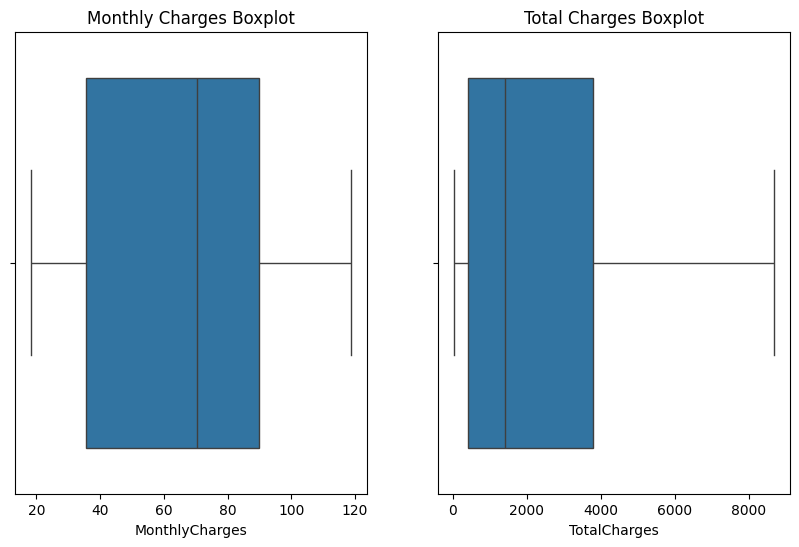

In [36]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data = df, x='MonthlyCharges')
plt.title("Monthly Charges Boxplot")

plt.subplot(1,2,2)
sns.boxplot(data = df, x='TotalCharges')
plt.title("Total Charges Boxplot")

# lets describe all numerical feature

In [38]:
df[['TotalCharges', 'MonthlyCharges', 'tenure']].describe()

,TotalCharges,MonthlyCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,2281.916928,64.761692,32.371149
std,2265.270398,30.090047,24.559481
min,18.800000,18.250000,0.000000
25%,402.225000,35.500000,9.000000
50%,1397.475000,70.350000,29.000000
75%,3786.600000,89.850000,55.000000
max,8684.800000,118.750000,72.000000


In [39]:
df['tenure'].median()

29.0

# to understand the distribution of tenure we can visualise by histogram

Text(0, 0.5, 'Frequency')

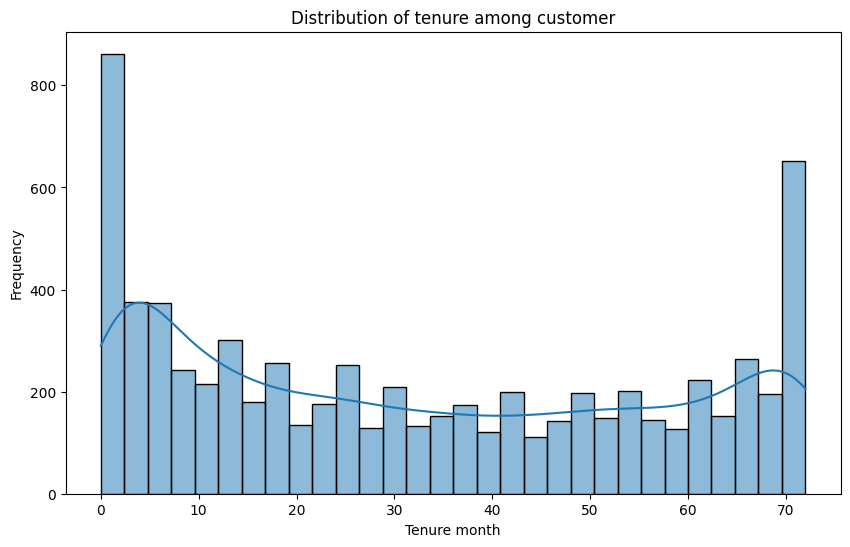

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', kde=True, bins=30)
plt.title("Distribution of tenure among customer")
plt.xlabel("Tenure month")
plt.ylabel("Frequency")

#insights
- The fact that distribution looks like uniform
- that means the customers distributed uniformly among all tenure periods

- in the distribution its showing the maximum customers count in first month may be because of the new customers entry in every first month, and maximum count showing for 72 month that mean may be there was a discount for any customer

# check for the MonthlyCharges and TotalCharges distribution

Text(0, 0.5, 'Frequency')

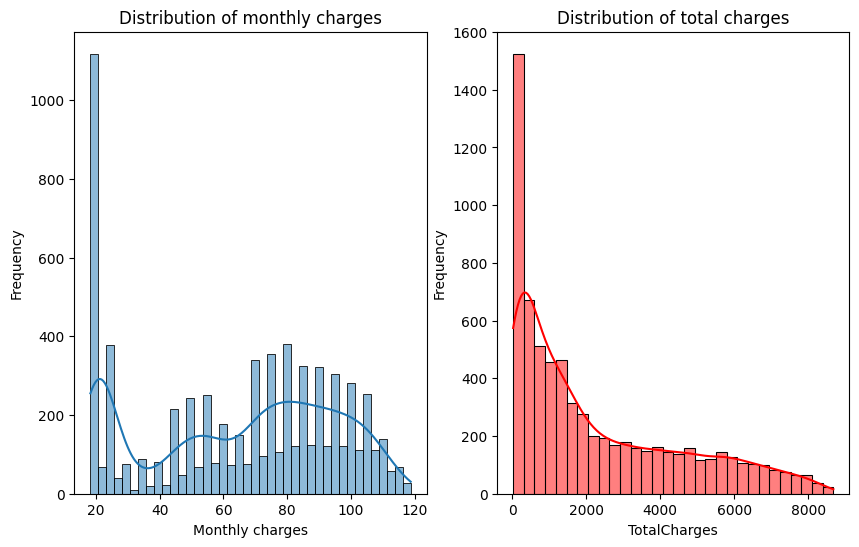

In [44]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='MonthlyCharges', kde=True, bins=40)
plt.title("Distribution of monthly charges")
plt.xlabel("Monthly charges")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.histplot(data = df, x='TotalCharges', kde=True, bins=30, color='Red')
plt.title("Distribution of total charges")
plt.xlabel("TotalCharges")
plt.ylabel("Frequency")

# 12. check for the categories in the contract type

In [45]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [52]:
contract_count = df['Contract'].value_counts()

In [54]:
contract_count

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


<Axes: xlabel='Contract'>

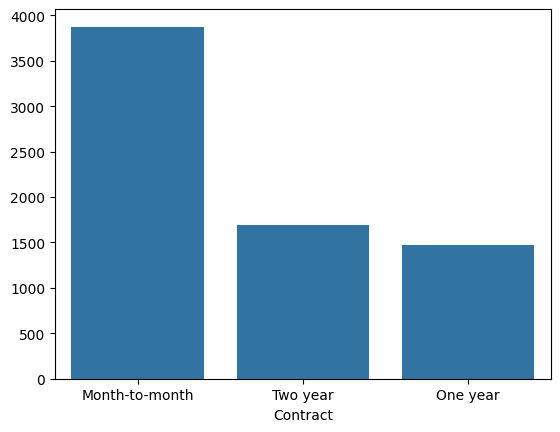

In [55]:
sns.barplot(x= contract_count.index, y= contract_count.values)

In [57]:
contract_count = df.groupby(['Contract', 'Churn']).size().unstack()

In [58]:
contract_count

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


<Axes: xlabel='Contract', ylabel='count'>

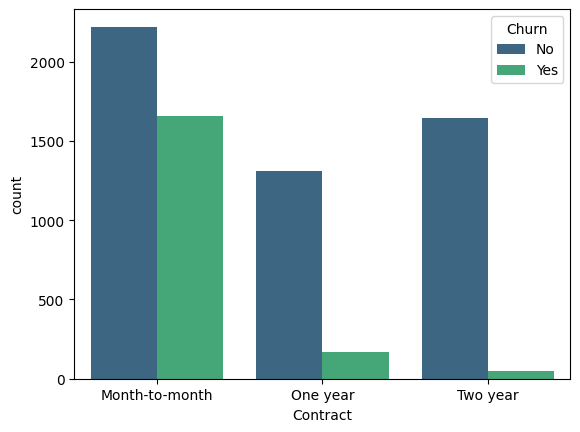

In [59]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')

# insights
majority customer churn rate is in month-to-month contract

 business implication - month-to-month contract may need discounts or incentive to commit to a lnger contract

- may provide some rewards or gift hamper
- coupon code for 1 year contract
- offers for services